In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("model.csv",index_col=0)

In [3]:
x=df[["TV","radio","newspaper"]]
x[:3]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3


In [4]:
y=df[["sales"]]
y[:3]

,sales
1,22.1
2,10.4
3,9.3


In [5]:
x=x.drop("newspaper",axis=1)

In [6]:
x.tail()

,TV,radio
196,38.2,3.7
197,94.2,4.9
198,177.0,9.3
199,283.6,42.0
200,232.1,8.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.describe(percentiles=[0.2,0.6,0.9,0.8])

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
20%,59.180000,7.680000,9.380000,9.700000
50%,149.750000,22.900000,25.750000,12.900000
60%,186.060000,27.860000,32.700000,14.800000
80%,228.540000,38.920000,49.640000,18.920000
90%,261.440000,43.520000,59.070000,21.710000
max,296.400000,49.600000,114.000000,27.000000


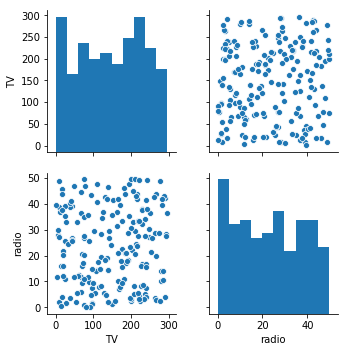

In [11]:
sns.pairplot(x)

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


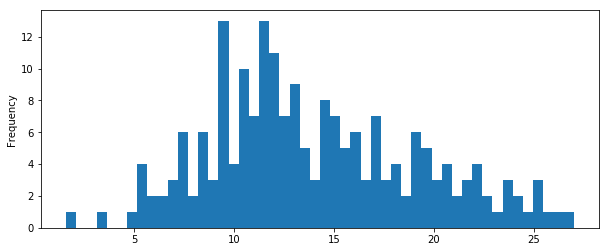

In [13]:
df["sales"].plot.hist(bins=50,figsize=(10,4))

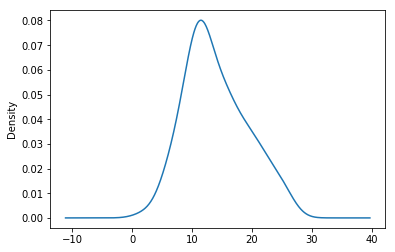

In [14]:
df["sales"].plot.density()

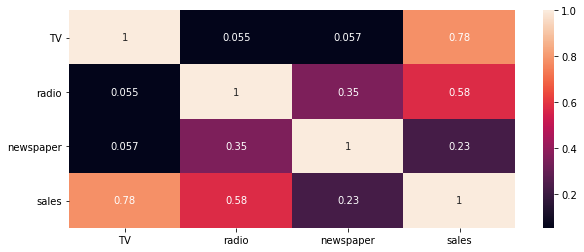

In [15]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

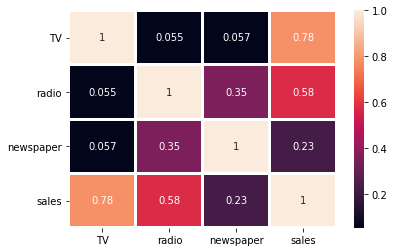

In [16]:
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [17]:
df.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [18]:
len_df=len(df.columns)
len_df

4

x=df.columns[0:len_df-2]
y=df.columns[[len_df-1]]

print(x)
print(x.shape)
print(y.shape)
print(y)

df.columns
len_df

In [41]:
x=df[["TV","radio"]]
x.shape

(200, 2)

In [40]:
y=df[["sales"]]
y.shape

(200, 1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
train_predict=lr.predict(x_train)
test_predict=lr.predict(x_test)

In [29]:
metrics.mean_squared_error(y_train,train_predict)


3.102709799351882

In [30]:
metrics.mean_squared_error(y_test,test_predict)

2.091161440202538

In [31]:
metrics.mean_absolute_error(y_test,test_predict)

1.154446415738911

In [32]:
metrics.mean_absolute_error(y_train,train_predict)

1.3308242270628852

In [35]:
metrics.r2_score(y_test,test_predict)
                

0.9207135484127121

In [36]:
metrics.r2_score(y_train,train_predict)

0.8867196807314526

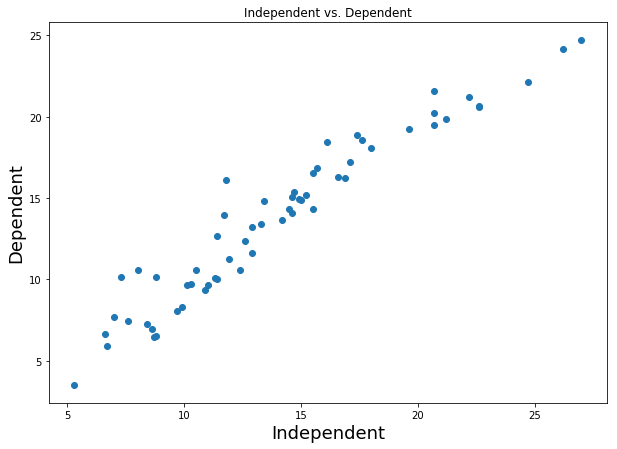

In [45]:
plt.figure(figsize=(10,7))
plt.title("Independent vs. Dependent",)
plt.xlabel("Independent",fontsize=18)
plt.ylabel("Dependent",fontsize=18)
plt.scatter(x=y_test,y=test_predict)

ValueError: cannot copy sequence with size 60 to array axis with dimension 1

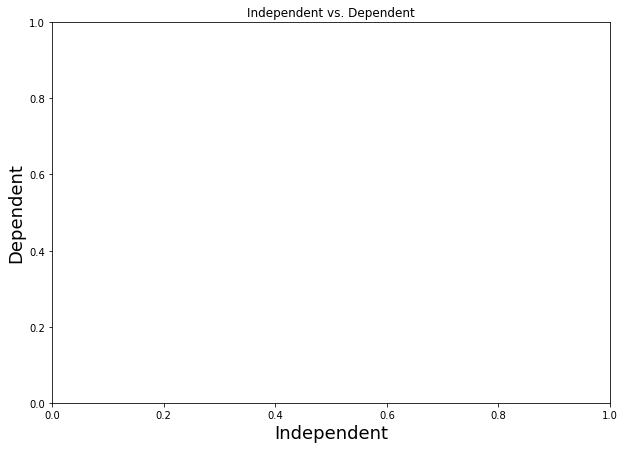

In [44]:
plt.figure(figsize=(10,7))
plt.title("Independent vs. Dependent",)
plt.xlabel("Independent",fontsize=18)
plt.ylabel("Dependent",fontsize=18)
sns.distplot([y_test-test_predict])